# SZENARIO 2

### The diagrams of the power balance analysis for Scenario 2

note: G_2017 data is stündliche Bestrahlungsstaärke in 2017

In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('G_2017')

# Display the first 5 rows of the data
df.tail(10)


,time,G(i)
8750,2017-12-31 14:30:00,239.0
8751,2017-12-31 15:30:00,0.0
8752,2017-12-31 16:30:00,0.0
8753,2017-12-31 17:30:00,0.0
8754,2017-12-31 18:30:00,0.0
8755,2017-12-31 19:30:00,0.0
8756,2017-12-31 20:30:00,0.0
8757,2017-12-31 21:30:00,0.0
8758,2017-12-31 22:30:00,0.0
8759,2017-12-31 23:30:00,0.0


In [2]:
from datetime import datetime, timedelta

# Convert the time column to a datetime object
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df = df.set_index('time')

#change column name
df['G(i)'] = df['G(i)'].astype(float)
df=df.rename(columns={'G(i)': 'Bestrahlungsstärke[W/m2]'})
df

,Bestrahlungsstärke[W/m2]
time,
2017-01-01 00:30:00,0.0
2017-01-01 01:30:00,0.0
2017-01-01 02:30:00,0.0
2017-01-01 03:30:00,0.0
2017-01-01 04:30:00,0.0
...,...
2017-12-31 19:30:00,0.0
2017-12-31 20:30:00,0.0
2017-12-31 21:30:00,0.0


In [3]:
#creating  anew column for hourly power of the solar energy system 
A=59169
eff=0.2
PR=0.75

df['Stromerzeugung [kWh]'] = df['Bestrahlungsstärke[W/m2]'] * A * eff*PR/1000

print(df)

                     Bestrahlungsstärke[W/m2]  Stromerzeugung [kWh]
time                                                               
2017-01-01 00:30:00                       0.0                   0.0
2017-01-01 01:30:00                       0.0                   0.0
2017-01-01 02:30:00                       0.0                   0.0
2017-01-01 03:30:00                       0.0                   0.0
2017-01-01 04:30:00                       0.0                   0.0
...                                       ...                   ...
2017-12-31 19:30:00                       0.0                   0.0
2017-12-31 20:30:00                       0.0                   0.0
2017-12-31 21:30:00                       0.0                   0.0
2017-12-31 22:30:00                       0.0                   0.0
2017-12-31 23:30:00                       0.0                   0.0

[8760 rows x 2 columns]


In [4]:
#create the list of hourly electricity consumption according to the literature
values_to_repeat = [354.814079, 354.814079, 354.814079, 354.814079, 354.814079, 354.814079, 753.9799178, 1374.904556, 2483.698553, 2439.346793, 3592.49255, 4435.175987, 6076.191102, 6519.708701, 6519.708701, 4745.638306, 1330.552796, 354.814079, 354.814079, 354.814079, 354.814079, 354.814079, 354.814079, 354.814079]

# repeat the values 366 times using the pandas' `repeat` function
values_repeated = values_to_repeat*365

# create a pandas DataFrame with the repeated values as a new column
df['Stromverbrauch [kWh]'] = values_repeated
# print the resulting DataFrame
df

,Bestrahlungsstärke[W/m2],Stromerzeugung [kWh],Stromverbrauch [kWh]
time,,,
2017-01-01 00:30:00,0.0,0.0,354.814079
2017-01-01 01:30:00,0.0,0.0,354.814079
2017-01-01 02:30:00,0.0,0.0,354.814079
2017-01-01 03:30:00,0.0,0.0,354.814079
2017-01-01 04:30:00,0.0,0.0,354.814079
...,...,...,...
2017-12-31 19:30:00,0.0,0.0,354.814079
2017-12-31 20:30:00,0.0,0.0,354.814079
2017-12-31 21:30:00,0.0,0.0,354.814079


In [5]:
#create column for Primärstromverbrauch
eff_WR=0.98

df['Primärstromverbrauch [kWh]']=df['Stromverbrauch [kWh]']/eff_WR

df

,Bestrahlungsstärke[W/m2],Stromerzeugung [kWh],Stromverbrauch [kWh],Primärstromverbrauch [kWh]
time,,,,
2017-01-01 00:30:00,0.0,0.0,354.814079,362.055183
2017-01-01 01:30:00,0.0,0.0,354.814079,362.055183
2017-01-01 02:30:00,0.0,0.0,354.814079,362.055183
2017-01-01 03:30:00,0.0,0.0,354.814079,362.055183
2017-01-01 04:30:00,0.0,0.0,354.814079,362.055183
...,...,...,...,...
2017-12-31 19:30:00,0.0,0.0,354.814079,362.055183
2017-12-31 20:30:00,0.0,0.0,354.814079,362.055183
2017-12-31 21:30:00,0.0,0.0,354.814079,362.055183


In [6]:
df.columns

Index(['Bestrahlungsstärke[W/m2]', 'Stromerzeugung [kWh]',
       'Stromverbrauch [kWh]', 'Primärstromverbrauch [kWh]'],
      dtype='object')

In [7]:
#create a column to determine überschuss und defizit
def balance(row):
    if row['Stromerzeugung [kWh]'] - row['Primärstromverbrauch [kWh]'] > 0:
        result = row['Stromerzeugung [kWh]'] - row['Primärstromverbrauch [kWh]']
    else:
        result = 0.98 * row['Stromerzeugung [kWh]'] - row['Stromverbrauch [kWh]']
    return result

# apply the function on each row and create a new column
df['balance'] = df.apply(balance, axis=1)

In [8]:
df.head(24)

,Bestrahlungsstärke[W/m2],Stromerzeugung [kWh],Stromverbrauch [kWh],Primärstromverbrauch [kWh],balance
time,,,,,
2017-01-01 00:30:00,0.00,0.000000,354.814079,362.055183,-354.814079
2017-01-01 01:30:00,0.00,0.000000,354.814079,362.055183,-354.814079
2017-01-01 02:30:00,0.00,0.000000,354.814079,362.055183,-354.814079
2017-01-01 03:30:00,0.00,0.000000,354.814079,362.055183,-354.814079
2017-01-01 04:30:00,0.00,0.000000,354.814079,362.055183,-354.814079
2017-01-01 05:30:00,0.00,0.000000,354.814079,362.055183,-354.814079
2017-01-01 06:30:00,0.00,0.000000,753.979918,769.367263,-753.979918
2017-01-01 07:30:00,11.97,106.237940,1374.904556,1402.963833,-1270.791375
2017-01-01 08:30:00,319.94,2839.579479,2483.698553,2534.386279,305.193200


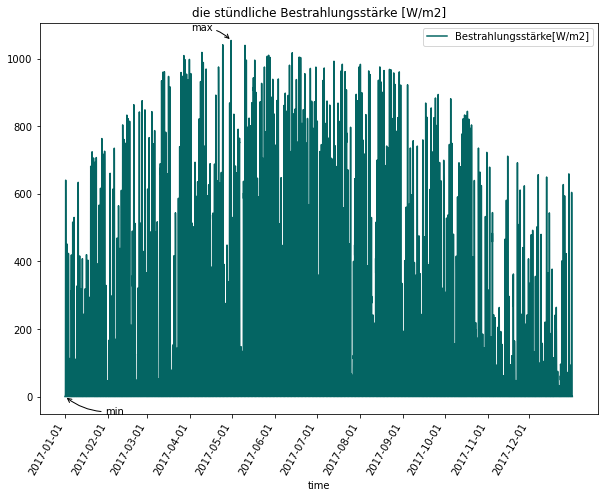

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 8))

df.plot(y='Bestrahlungsstärke[W/m2]', ax=ax, color='#046563')
ax.set_title('die stündliche Bestrahlungsstärke [W/m2]')

# Set x-axis tick labels
date_range = pd.date_range(start=df.index[0], end=df.index[-1], freq='MS')
ax.set_xticks(date_range)
ax.set_xticklabels(date_range.strftime('%Y-%m-%d'), rotation=60)

# Set tick formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.annotate('max', xy=(df['Bestrahlungsstärke[W/m2]'].idxmax(), df['Bestrahlungsstärke[W/m2]'].max()), xytext=(-40, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2'))
ax.annotate('min', xy=(df['Bestrahlungsstärke[W/m2]'].idxmin(), df['Bestrahlungsstärke[W/m2]'].min()), xytext=(40, -18), textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2'))
plt.show()

In [11]:
max_row = df.loc[df['balance'].idxmax()]
print(max_row)

Bestrahlungsstärke[W/m2]       944.450000
Stromerzeugung [kWh]          8382.324308
Stromverbrauch [kWh]          2439.346793
Primärstromverbrauch [kWh]    2489.129381
balance                       5893.194927
Name: 2017-04-30 09:30:00, dtype: float64


In [12]:
min_row = df.loc[df['balance'].idxmin()]
print(min_row)

Bestrahlungsstärke[W/m2]         5.680000
Stromerzeugung [kWh]            50.411988
Stromverbrauch [kWh]          6519.708701
Primärstromverbrauch [kWh]    6652.763981
balance                      -6470.304953
Name: 2017-12-22 14:30:00, dtype: float64


In [13]:
max_row = df.loc[df['Bestrahlungsstärke[W/m2]'].idxmax()]
print(max_row)

Bestrahlungsstärke[W/m2]      1054.560000
Stromerzeugung [kWh]          9359.589096
Stromverbrauch [kWh]          4435.175987
Primärstromverbrauch [kWh]    4525.689783
balance                       4833.899313
Name: 2017-04-30 11:30:00, dtype: float64


In [14]:
positive_values = df[df['balance'] <= 0]  # Select only positive or zero values
average = positive_values['balance'].mean()  # Calculate the mean of the positive values

print(average)

-1010.5851045506179


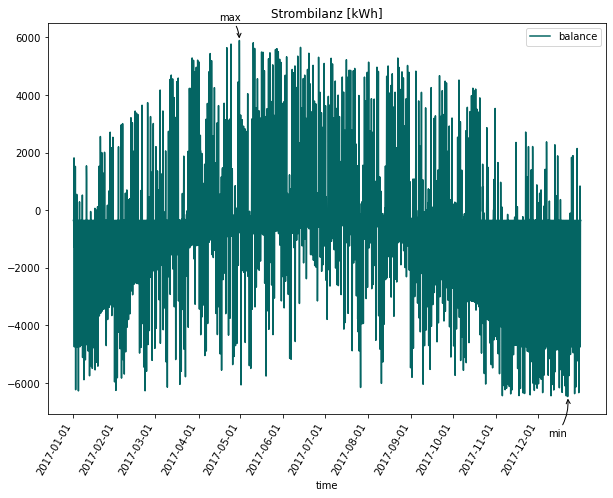

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 8))

df.plot(y='balance', ax=ax, color='#046563')
ax.set_title('Strombilanz [kWh]')

# Set x-axis tick labels
date_range = pd.date_range(start=df.index[0], end=df.index[-1], freq='MS')
ax.set_xticks(date_range)
ax.set_xticklabels(date_range.strftime('%Y-%m-%d'), rotation=60)

# Set tick formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.annotate('max', xy=(df['balance'].idxmax(), df['balance'].max()), xytext=(-20, 20), textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2'))
ax.annotate('min', xy=(df['balance'].idxmin(), df['balance'].min()), xytext=(-20, -40), textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))
plt.show()

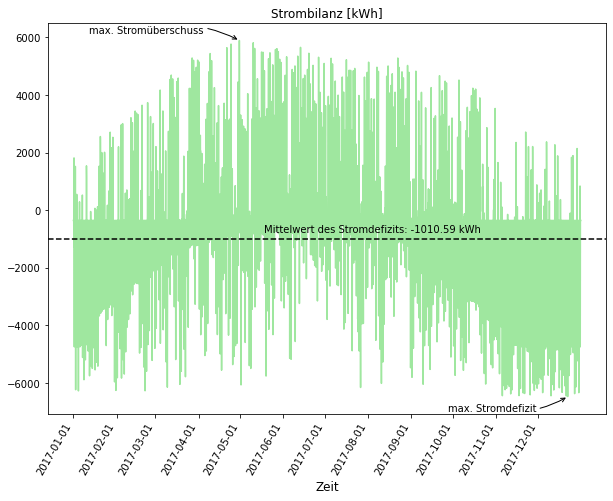

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 8))

df.plot(y='balance', ax=ax, color='#77DD77', alpha=0.7, legend=None)
ax.set_title('Strombilanz [kWh]')

# Set x-axis tick labels
date_range = pd.date_range(start=df.index[0], end=df.index[-1], freq='MS')
ax.set_xticks(date_range)
ax.set_xticklabels(date_range.strftime('%Y-%m-%d'), rotation=60)
ax.set_xlabel('Zeit', fontsize=12)

# Set tick formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# mean
mean_defizit = negative['balance'].mean()
ax.axhline(y=mean_defizit, color='black', linestyle='--', label='Mean Defizit')

ax.spines['bottom'].set_visible(True)


# Annotate negative mean value on the plot
ax.annotate(f'Mittelwert des Stromdefizits: {mean_defizit:.2f} kWh', xy=(df.index[-1], mean_defizit), xytext=(-100, 10), textcoords='offset points', ha='right', va='center')

ax.annotate('max. Stromüberschuss', xy=(df['balance'].idxmax(), df['balance'].max()), xytext=(-150, 7), textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2'))
ax.annotate('max. Stromdefizit', xy=(df['balance'].idxmin(), df['balance'].min()), xytext=(-120, -15), textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))

plt.show()
